# BankLoan Dataset
Responsibility : Yahia Ehab

## Imports

In [97]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# For implementing ensemble models
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Selection

In [98]:
df = pd.read_csv("./AMLAss1Datasets/bankloan.csv")  # Suitable for regression

## Preprocessing

* Dataset has no nulls
* Choosing only columns that we will use
* Scaling the numerical features 
    ```python
    StandardScaler() #Scaling data to fit a standard normal distribution
    ```
* Encoding the categorical features
    ```python
    label_encoder = LabelEncoder() #Convert categorical variables into numerical format
    ```
* Removing outliers using `IQR` method

In [99]:
df = df[
    [
        "Age", "Experience", "Income",
        "Family", "CCAvg", "Education",
        "Mortgage", "Personal.Loan", "Securities.Account",
        "CD.Account", "Online", "CreditCard",
    ]
]

# Renaming the columns
df.columns = [
    "age", "experience", "income", "family",
    "cc_avg","education", "mortgage", 
    "personal_loan", "securities_account", 
    "cd_account", "online", "credit_card",
]

In [100]:
# Scaling the numerical features
scaler = StandardScaler()
df[["age", "experience", "income", "cc_avg", "mortgage"]] = scaler.fit_transform(
    df[["age", "experience", "income", "cc_avg", "mortgage"]]
)

# Encoding the categorical features
label_encoder = LabelEncoder()
df["education"] = label_encoder.fit_transform(df["education"])

In [101]:
df.head()

,age,experience,income,family,cc_avg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
0,-1.774417,-1.666078,-0.538229,4,-0.193385,0,-0.555524,0,1,0,0,0
1,-0.029524,-0.096330,-0.864109,3,-0.250611,0,-0.555524,0,1,0,0,0
2,-0.552992,-0.445163,-1.363793,1,-0.536736,0,-0.555524,0,0,0,0,0
3,-0.901970,-0.968413,0.569765,1,0.436091,1,-0.555524,0,0,0,0,0
4,-0.901970,-1.055621,-0.625130,4,-0.536736,1,-0.555524,0,0,0,0,1


## Model Implementation &  Hyperparameter Turning

References :
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html 
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
* Grid Search vs Randomized Search:
    - One of the main differences between random search and grid search is the way they search the hyperparameter space. Grid search evaluates the model's performance on a predefined grid of hyperparameters, whereas random search samples hyperparameters randomly from a distribution. 
    - Grid search can be more efficient in cases where the hyperparameters are highly correlated and have a strong interaction effect, but it can be computationally expensive when the hyperparameter space is large. On the other hand, the random search can be more efficient when the hyperparameter space is large and the optimal hyperparameters are not highly correlated. 
    - Another difference between random search and grid search is the number of hyperparameters they can search. Grid search can search a large number of hyperparameters, but it can become computationally expensive as the number of hyperparameters increases. Random search, on the other hand, can search a larger number of hyperparameters without becoming too computationally expensive, as it samples hyperparameters randomly.
    - Important Params:
        1. `cv` controls the number of folds used in cross-validation, affecting the accuracy of performance estimates
        2. `n_jobs` controls parallelization, affecting the speed of grid search

## Steps to follow

### For every model

1. Train Test Split using predefined method
2. Apply Models & Hyperparameter Tuning
    * Random Forest
        - RandomSearch
        - GridSearch
        - Get the best model from the tuning best parameters
    * Adaboost
        - RandomSearch
        - GridSearch        
        - Get the best model from the tuning best parameters
    * Gradient Boost
        - RandomSearch
        - GridSearch
        - Get the best model from the tuning best parameters
3. Final Comparison between models through the :
    ```python
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    ```

### Train Test split

In [102]:
X = df.drop("personal_loan", axis=1)
y = df["personal_loan"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Random Forrest Classifier

In [103]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,zero_division=1))
print("Recall:", recall_score(y_test, y_pred,zero_division=1))
print("F1 Score:", f1_score(y_test, y_pred,zero_division=1))

Random Forest Classifier
Accuracy: 0.991
Precision: 0.9897959183673469
Recall: 0.9238095238095239
F1 Score: 0.9556650246305419


In [104]:
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "max_features": ["auto", "sqrt"],
}

In [105]:
rf_random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=50, cv=3)

rf_random_search.fit(X_train, y_train)

rf_random_search.best_params_

{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None}

In [106]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

rf_grid_search = GridSearchCV(rf_model, param_grid=param_dist, cv=3, n_jobs=-1)

rf_grid_search.fit(X_train, y_train)

rf_grid_search.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

In [107]:
# Random Forest Classifier with best hyperparameters
MAX_DEPTH = 10
BOOTSTRAP = False
MIN_SAMPLES_LEAF = 1
MIN_SAMPLES_SPLIT = 2
N_ESTIMATORS = 150
MAX_FEATURES = 'sqrt'

rf_model_best = RandomForestClassifier(
    max_depth=MAX_DEPTH,
    bootstrap=BOOTSTRAP,
    min_samples_leaf=MIN_SAMPLES_LEAF,
    min_samples_split=MIN_SAMPLES_SPLIT,
    n_estimators=N_ESTIMATORS,
    max_features=MAX_FEATURES,
)

rf_model_best.fit(X_train, y_train)
y_pred_best = rf_model_best.predict(X_test)

# Model evaluation
print("Random Forest Classifier with best hyperparameters")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,zero_division=1))
print("Recall:", recall_score(y_test, y_pred,zero_division=1))
print("F1 Score:", f1_score(y_test, y_pred,zero_division=1))

Random Forest Classifier with best hyperparameters
Accuracy: 0.991
Precision: 0.9897959183673469
Recall: 0.9238095238095239
F1 Score: 0.9556650246305419


### AdaBoost

In [110]:
# AdaBoost Classifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

# Model evaluation
print("AdaBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,zero_division=1))
print("Recall:", recall_score(y_test, y_pred,zero_division=1))
print("F1 Score:", f1_score(y_test, y_pred,zero_division=1))

AdaBoost Classifier
Accuracy: 0.971
Precision: 0.8958333333333334
Recall: 0.819047619047619
F1 Score: 0.855721393034826


In [111]:
# Hyperparameters
param_dist = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 1],
}

In [112]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

ada_random_search = RandomizedSearchCV(
    ada_model, param_distributions=param_dist, n_iter=50, cv=3)

ada_random_search.fit(X_train, y_train)

ada_random_search.best_params_

{'n_estimators': 100, 'learning_rate': 1}

In [113]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

ada_grid_search = GridSearchCV(ada_model, param_grid=param_dist, cv=3, n_jobs=-1)

ada_grid_search.fit(X_train, y_train)

ada_grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [115]:
# AdaBoost Classifier with best hyperparameters
N_ESTIMATORS = 150
LEARNING_RATE = 1

ada_model_best = AdaBoostClassifier(
    n_estimators=N_ESTIMATORS,
    learning_rate=LEARNING_RATE,
)

ada_model_best.fit(X_train, y_train)
y_pred_best = ada_model_best.predict(X_test)

# Model evaluation
print("AdaBoost Classifier with best hyperparameters")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,zero_division=1))
print("Recall:", recall_score(y_test, y_pred,zero_division=1))
print("F1 Score:", f1_score(y_test, y_pred,zero_division=1))

AdaBoost Classifier with best hyperparameters
Accuracy: 0.971
Precision: 0.8958333333333334
Recall: 0.819047619047619
F1 Score: 0.855721393034826


### Gradient Boost

In [118]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,zero_division=1))
print("Recall:", recall_score(y_test, y_pred,zero_division=1))
print("F1 Score:", f1_score(y_test, y_pred,zero_division=1))

Gradient Boosting Classifier
Accuracy: 0.992
Precision: 0.98989898989899
Recall: 0.9333333333333333
F1 Score: 0.9607843137254903


In [119]:
# Hyperparameters
param_dist = {
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 1],
}

In [120]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

gb_random_search = RandomizedSearchCV(
    gb_model, param_distributions=param_dist, n_iter=50, cv=3)

gb_random_search.fit(X_train, y_train)

gb_random_search.best_params_

{'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.1}

In [121]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

gb_grid_search = GridSearchCV(gb_model, param_grid=param_dist, cv=3, n_jobs=-1)

gb_grid_search.fit(X_train, y_train)

gb_grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

In [123]:
# Gradient Boosting Classifier with best hyperparameters
N_ESTIMATORS = 150
MAX_DEPTH = 3
LEARNING_RATE = 0.1

gb_model_best = GradientBoostingClassifier(
    n_estimators=N_ESTIMATORS,
    max_depth=MAX_DEPTH,
    learning_rate=LEARNING_RATE,
)

gb_model_best.fit(X_train, y_train)
y_pred_best = gb_model_best.predict(X_test)

print("Gradient Boosting Classifier with best hyperparameters")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,zero_division=1))
print("Recall:", recall_score(y_test, y_pred,zero_division=1))
print("F1 Score:", f1_score(y_test, y_pred,zero_division=1))

Gradient Boosting Classifier with best hyperparameters
Accuracy: 0.992
Precision: 0.98989898989899
Recall: 0.9333333333333333
F1 Score: 0.9607843137254903


## Final Comparison

In [126]:
# Comparing the performance of the models
models = [
    "Random Forest Classifier",
    "Random Forest Classifier with best hyperparameters",
    "AdaBoost Classifier",
    "AdaBoost Classifier with best hyperparameters",
    "Gradient Boosting Classifier",
    "Gradient Boosting Classifier with best hyperparameters",
]

accuracies = [
    accuracy_score(y_test, rf_model.predict(X_test)),
    accuracy_score(y_test, rf_model_best.predict(X_test)),
    accuracy_score(y_test, ada_model.predict(X_test)),
    accuracy_score(y_test, ada_model_best.predict(X_test)),
    accuracy_score(y_test, gb_model.predict(X_test)),
    accuracy_score(y_test, gb_model_best.predict(X_test)),
]

precisions = [
    precision_score(y_test, rf_model.predict(X_test), zero_division=1),
    precision_score(y_test, rf_model_best.predict(X_test), zero_division=1),
    precision_score(y_test, ada_model.predict(X_test), zero_division=1),
    precision_score(y_test, ada_model_best.predict(X_test), zero_division=1),
    precision_score(y_test, gb_model.predict(X_test), zero_division=1),
    precision_score(y_test, gb_model_best.predict(X_test), zero_division=1),
]

recalls = [
    recall_score(y_test, rf_model.predict(X_test), zero_division=1),
    recall_score(y_test, rf_model_best.predict(X_test), zero_division=1),
    recall_score(y_test, ada_model.predict(X_test), zero_division=1),
    recall_score(y_test, ada_model_best.predict(X_test), zero_division=1),
    recall_score(y_test, gb_model.predict(X_test), zero_division=1),
    recall_score(y_test, gb_model_best.predict(X_test), zero_division=1),
]

f1_scores = [
    f1_score(y_test, rf_model.predict(X_test), zero_division=1),
    f1_score(y_test, rf_model_best.predict(X_test), zero_division=1),
    f1_score(y_test, ada_model.predict(X_test), zero_division=1),
    f1_score(y_test, ada_model_best.predict(X_test), zero_division=1),
    f1_score(y_test, gb_model.predict(X_test), zero_division=1),
    f1_score(y_test, gb_model_best.predict(X_test), zero_division=1),
]

model_comparison = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
})

model_comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,0.991,0.989796,0.923810,0.955665
1,Random Forest Classifier with best hyperparame...,0.990,0.979798,0.923810,0.950980
2,AdaBoost Classifier,0.971,0.895833,0.819048,0.855721
3,AdaBoost Classifier with best hyperparameters,0.970,0.886598,0.819048,0.851485
4,Gradient Boosting Classifier,0.992,0.989899,0.933333,0.960784
5,Gradient Boosting Classifier with best hyperpa...,0.992,0.989899,0.933333,0.960784


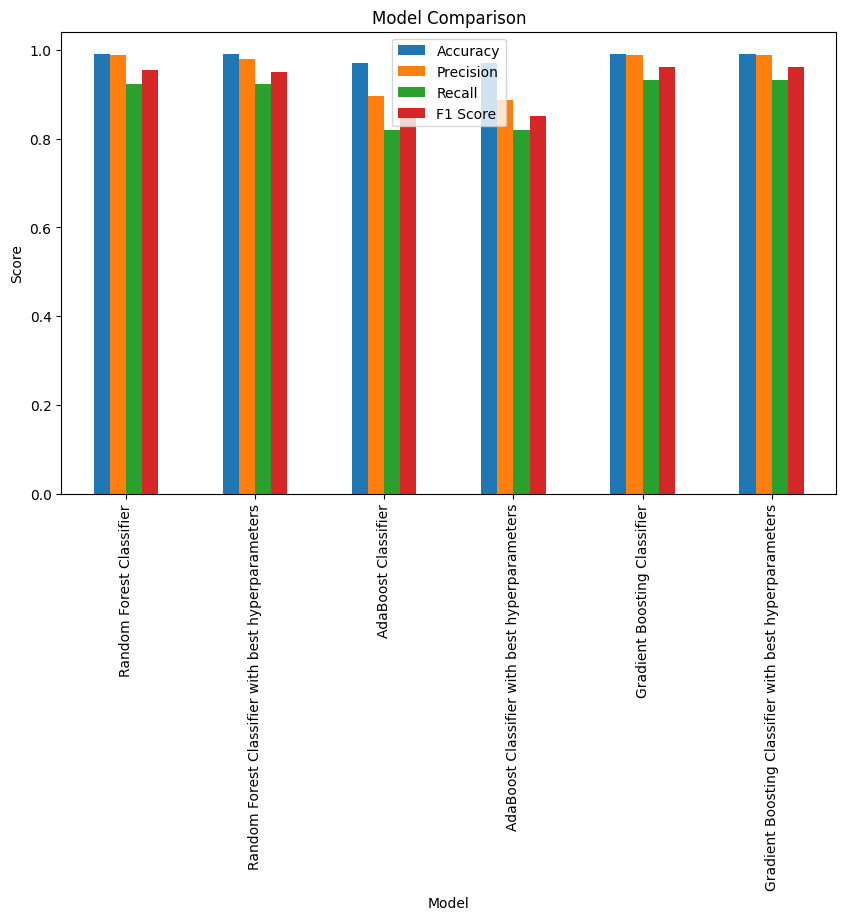

In [133]:
# Another type of plot
model_comparison.plot(kind="bar", x="Model", figsize=(10, 6))

plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.show()